<a href="https://colab.research.google.com/github/fahad3345/Air-Quality-prediction/blob/main/final_air_pollution_CSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('air_pollution_dataset.csv')
df.head()

,PM2.5,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,...,Installed Capacity of Power as of 2022(Megawatt),Death Rate as of 2020(Per 1000),CNG ONLY,DIESEL,DIESEL/HYBRID,ELECTRIC(BOV),PETROL,PETROL/CNG,PETROL/HYBRID,Time Periods
0,549.256878,181.010975,91.247522,188.364425,79.707417,10.175812,3.520142,23.411029,NaN,NaN,...,7617,3.6,"13,968","10,528",32,"12,379","3,60,440","21,424","5,313",2020-01-01 00:00
1,435.438303,194.247049,79.661701,203.481853,66.258913,11.615925,3.464807,29.331609,9.827428,NaN,...,7617,3.6,"13,968","10,528",32,"12,379","3,60,440","21,424","5,313",2020-01-01 04:00
2,453.312378,112.499494,121.740909,153.914993,74.356791,10.590183,2.460498,30.172308,9.085975,NaN,...,7617,3.6,"13,968","10,528",32,"12,379","3,60,440","21,424","5,313",2020-01-01 08:00
3,186.603123,56.922094,114.142207,91.504524,NaN,12.217971,1.405930,30.493537,3.884649,104.475114,...,7617,3.6,"13,968","10,528",32,"12,379","3,60,440","21,424","5,313",2020-01-01 12:00
4,262.616309,77.363086,123.790340,117.065760,NaN,13.331616,2.692100,18.045684,5.605006,96.718827,...,7617,3.6,"13,968","10,528",32,"12,379","3,60,440","21,424","5,313",2020-01-01 16:00


In [3]:
df.shape

(223584, 45)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223584 entries, 0 to 223583
Data columns (total 45 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   PM2.5                                             218044 non-null  float64
 1   NO                                                218735 non-null  float64
 2   NO2                                               218244 non-null  float64
 3   NOx                                               217612 non-null  float64
 4   NH3                                               217948 non-null  float64
 5   SO2                                               219700 non-null  float64
 6   CO                                                219762 non-null  float64
 7   Ozone                                             219154 non-null  float64
 8   Benzene                                           217487 non-null  float64
 9   Tolu

In [5]:
#correlation between columns
df.corr()

<ipython-input-5-3acc4ca6049f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PM2.5,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,...,Latitude,Longitude,Total Length of Roads as of 2019(Km),Length of National Highways as of 2022(Km),Railway Route as of 2021(Km),Forest Cover as of 2021(sq Km),Number of Factories as of 2020 (Units),Installed Capacity of Power as of 2022(Megawatt),Death Rate as of 2020(Per 1000),DIESEL/HYBRID
PM2.5,1.000000,0.406134,0.412761,0.430514,0.302344,0.104607,0.498295,-0.030020,0.159300,0.179617,...,0.298936,-0.057996,-0.036287,-0.028129,0.001795,-0.169389,-0.102795,-0.098945,-0.171840,-0.068555
NO,0.406134,1.000000,0.616157,0.867919,0.352048,0.099425,0.557309,-0.202120,0.183573,0.191297,...,0.070942,-0.052575,-0.062639,-0.051559,-0.041666,-0.132124,-0.052561,-0.058213,-0.101403,-0.049520
NO2,0.412761,0.616157,1.000000,0.839279,0.341577,0.196436,0.722520,-0.067458,0.101446,0.266462,...,0.110554,0.023157,-0.004904,-0.020084,-0.004322,-0.081959,-0.166949,-0.098339,-0.116886,-0.091602
NOx,0.430514,0.867919,0.839279,1.000000,0.362877,0.180766,0.701817,-0.177734,0.205285,0.246238,...,0.038070,0.018191,-0.013104,-0.023262,-0.016669,-0.098442,-0.094795,-0.060632,-0.086783,-0.053600
NH3,0.302344,0.352048,0.341577,0.362877,1.000000,0.017060,0.184187,-0.064157,0.183590,-0.013867,...,0.271597,-0.264852,0.062749,0.164214,0.145287,-0.165205,0.034549,0.102645,-0.133726,0.085688
SO2,0.104607,0.099425,0.196436,0.180766,0.017060,1.000000,0.144932,-0.020981,-0.007797,0.067195,...,0.130330,0.374409,-0.209962,-0.196727,-0.207392,0.024018,-0.251777,-0.276159,-0.157989,-0.200269
CO,0.498295,0.557309,0.722520,0.701817,0.184187,0.144932,1.000000,-0.106014,0.112198,0.315983,...,0.120449,0.022746,0.017710,-0.010333,0.015185,-0.108356,-0.071079,-0.068581,-0.056218,-0.082959
Ozone,-0.030020,-0.202120,-0.067458,-0.177734,-0.064157,-0.020981,-0.106014,1.000000,-0.114608,0.195017,...,0.047916,0.011407,0.220379,0.145197,0.145319,0.226765,-0.067200,0.075773,0.038994,0.021709
Benzene,0.159300,0.183573,0.101446,0.205285,0.183590,-0.007797,0.112198,-0.114608,1.000000,0.117325,...,0.095751,0.054820,0.043433,0.046052,0.067547,-0.046739,0.007038,-0.010758,0.025471,0.071092
Toluene,0.179617,0.191297,0.266462,0.246238,-0.013867,0.067195,0.315983,0.195017,0.117325,1.000000,...,0.065177,-0.025344,-0.013849,0.003332,-0.059996,0.456794,-0.215489,-0.012007,0.084611,-0.099272


In [6]:
miss_val = df.isnull().sum()
miss_val_per = df.isnull().sum()*100/len(df)
miss_val_table = pd.concat([miss_val, miss_val_per], axis=1)
miss_val_table

,0,1
PM2.5,5540,2.477816
NO,4849,2.168760
NO2,5340,2.388364
NOx,5972,2.671032
NH3,5636,2.520753
SO2,3884,1.737155
CO,3822,1.709425
Ozone,4430,1.981358
Benzene,6097,2.726939
Toluene,56554,25.294297


In [7]:
miss_val_table = miss_val_table.rename(columns = {0:'missing values',1:'% of missing values'})
miss_val_table

,missing values,% of missing values
PM2.5,5540,2.477816
NO,4849,2.168760
NO2,5340,2.388364
NOx,5972,2.671032
NH3,5636,2.520753
SO2,3884,1.737155
CO,3822,1.709425
Ozone,4430,1.981358
Benzene,6097,2.726939
Toluene,56554,25.294297


In [8]:
miss_val_table = miss_val_table[miss_val_table.iloc[:,1] != 0].sort_values('% of missing values', ascending=False).round(1)
miss_val_table

,missing values,% of missing values
CH4,217008,97.1
VWS,179561,80.3
Temp,172116,77.0
O Xylene,100446,44.9
Xylene,85753,38.4
BP,64451,28.8
Toluene,56554,25.3
MP-Xylene,49322,22.1
Eth-Benzene,44297,19.8
RH,27211,12.2


In [9]:
df_preprocess = df.drop(['CH4','VWS','Temp','O Xylene',
                         'Xylene','BP','Toluene','MP-Xylene',
                         'Eth-Benzene','RH','TOT-RF','RF','Ozone','WD'], axis=1)

In [10]:
df_preprocess

,PM2.5,NO,NO2,NOx,NH3,SO2,CO,Benzene,WS,SR,...,Installed Capacity of Power as of 2022(Megawatt),Death Rate as of 2020(Per 1000),CNG ONLY,DIESEL,DIESEL/HYBRID,ELECTRIC(BOV),PETROL,PETROL/CNG,PETROL/HYBRID,Time Periods
0,549.256878,181.010975,91.247522,188.364425,79.707417,10.175812,3.520142,NaN,0.253857,9.051957,...,7617,3.6,"13,968","10,528",32,"12,379","3,60,440","21,424","5,313",2020-01-01 00:00
1,435.438303,194.247049,79.661701,203.481853,66.258913,11.615925,3.464807,9.827428,0.233245,20.697426,...,7617,3.6,"13,968","10,528",32,"12,379","3,60,440","21,424","5,313",2020-01-01 04:00
2,453.312378,112.499494,121.740909,153.914993,74.356791,10.590183,2.460498,9.085975,0.805488,258.230668,...,7617,3.6,"13,968","10,528",32,"12,379","3,60,440","21,424","5,313",2020-01-01 08:00
3,186.603123,56.922094,114.142207,91.504524,NaN,12.217971,1.405930,3.884649,1.160145,270.598584,...,7617,3.6,"13,968","10,528",32,"12,379","3,60,440","21,424","5,313",2020-01-01 12:00
4,262.616309,77.363086,123.790340,117.065760,NaN,13.331616,2.692100,5.605006,0.374948,41.110706,...,7617,3.6,"13,968","10,528",32,"12,379","3,60,440","21,424","5,313",2020-01-01 16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223579,196.989121,60.688939,88.463906,104.906711,109.511292,53.108086,2.336561,3.684526,0.377900,2.340000,...,43446,5.5,"48,888","2,96,334",155,"1,36,039","17,41,675","1,09,369","22,206",2022-12-31 04:00
223580,187.428487,56.707438,93.311216,103.099160,106.682026,55.535340,2.235001,3.388236,0.391317,2.340000,...,43446,5.5,"48,888","2,96,334",155,"1,36,039","17,41,675","1,09,369","22,206",2022-12-31 08:00
223581,176.635690,28.382382,87.318776,80.058537,110.258415,53.701056,1.754315,3.328736,0.452834,2.340000,...,43446,5.5,"48,888","2,96,334",155,"1,36,039","17,41,675","1,09,369","22,206",2022-12-31 12:00
223582,189.740021,12.664340,54.773063,51.766913,67.224030,40.155829,1.361177,2.423073,0.447797,2.340000,...,43446,5.5,"48,888","2,96,334",155,"1,36,039","17,41,675","1,09,369","22,206",2022-12-31 16:00


In [11]:
df_preprocess.interpolate(limit_direction="both",inplace=True)

In [12]:
df_preprocess['PETROL'] = df_preprocess['PETROL'].str.replace(',', '').astype(float)
df_preprocess['PETROL/HYBRID'] = df_preprocess['PETROL/HYBRID'].str.replace(',', '').astype(float)
df_preprocess['PETROL/CNG'] = df_preprocess['PETROL/CNG'].str.replace(',', '').astype(float)
df_preprocess['ELECTRIC(BOV)'] = df_preprocess['ELECTRIC(BOV)'].str.replace(',', '').astype(float)
df_preprocess['DIESEL'] = df_preprocess['DIESEL'].str.replace(',', '').astype(float)
df_preprocess['CNG ONLY'] = df_preprocess['CNG ONLY'].str.replace(',', '').astype(float)

In [13]:
df_preprocess_final = df_preprocess.copy()
median_cng_only = df_preprocess_final['CNG ONLY'].median()
median_cng_only

6091.0

In [14]:
df_preprocess_final['CNG ONLY'].fillna(median_cng_only, inplace=True)

In [15]:
df_preprocess_final.isnull().sum()

PM2.5                                               0
NO                                                  0
NO2                                                 0
NOx                                                 0
NH3                                                 0
SO2                                                 0
CO                                                  0
Benzene                                             0
WS                                                  0
SR                                                  0
AT                                                  0
City                                                0
State                                               0
Population as of 2021 (Estimated)                   0
Latitude                                            0
Longitude                                           0
Total Length of Roads as of 2019(Km)                0
Length of National Highways as of 2022(Km)          0
Railway Route as of 2021(Km)

In [16]:
#now there are zero columns that have no missing values
# Making a total vehicles column
df_preprocess_final['total_cars'] = df_preprocess_final['PETROL'] + df_preprocess_final['PETROL/HYBRID'] +df_preprocess_final['PETROL/CNG'] +df_preprocess_final['ELECTRIC(BOV)'] +df_preprocess_final['DIESEL'] + df_preprocess_final['CNG ONLY']
# Vehicle per person
df_preprocess_final['vehicle_per_person'] = df_preprocess_final['total_cars']/df_preprocess_final['Population as of 2021 (Estimated)']
# Total trasportable road
df_preprocess_final['total_road'] = df_preprocess_final['Length of National Highways as of 2022(Km)'] + df_preprocess_final['Total Length of Roads as of 2019(Km)']
#  Power consumed per person
df_preprocess_final['power_consumed_per_person'] = df_preprocess_final['Installed Capacity of Power as of 2022(Megawatt)']/df_preprocess_final['Population as of 2021 (Estimated)']
df_preprocess_final = df_preprocess_final.drop(['Death Rate as of 2020(Per 1000)','CNG ONLY','DIESEL','DIESEL/HYBRID','ELECTRIC(BOV)','PETROL','PETROL/CNG','PETROL/HYBRID'], axis=1)
df_preprocess_final.columns

Index(['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Benzene', 'WS', 'SR',
       'AT', 'City', 'State', 'Population as of 2021 (Estimated)', 'Latitude',
       'Longitude', 'Total Length of Roads as of 2019(Km)',
       'Length of National Highways as of 2022(Km)',
       'Railway Route as of 2021(Km)', 'Forest Cover as of 2021(sq Km)',
       'Number of Factories as of 2020 (Units)',
       'Installed Capacity of Power as of 2022(Megawatt)', 'Time Periods',
       'total_cars', 'vehicle_per_person', 'total_road',
       'power_consumed_per_person'],
      dtype='object')

In [17]:
df_preprocess_final['City'].unique()

array(['Delhi', 'Ahmedabad', 'Gandhinagar', 'Lucknow', 'Varanasi',
       'Meerut', 'Prayagraj', 'Ghaziabad', 'Agra', 'Noida', 'Kanpur',
       'Moradabad', 'Guwahati', 'Faridabad', 'Gurugram', 'Jaipur', 'Kota',
       'Imphal', 'Thiruvananthapuram', 'Agartala', 'Gaya', 'Muzaffarpur',
       'Patna', 'Srinagar', 'Howrah', 'Kolkata', 'Bhopal', 'Gwalior',
       'Bengaluru', 'Raipur', 'Bhilai', 'Chandigarh', 'Chennai', 'Mumbai'],
      dtype=object)

In [18]:
df_preprocess_final['Time Periods'] = pd.to_datetime(df_preprocess_final['Time Periods'])

In [19]:
df_Ahmedabad = df_preprocess_final[df_preprocess_final['City']== 'Ahmedabad']
df_Bengaluru = df_preprocess_final[df_preprocess_final['City']== 'Bengaluru']
df_Delhi     = df_preprocess_final[df_preprocess_final['City']== 'Delhi']
df_Agra = df_preprocess_final[df_preprocess_final['City']== 'Agra']
df_Kolkata   = df_preprocess_final[df_preprocess_final['City']== 'Kolkata']
df_Kota = df_preprocess_final[df_preprocess_final['City'] == 'Kota']
df_Gandhinagar = df_preprocess_final[df_preprocess_final['City'] == 'Gandhinagar']
df_Meerut = df_preprocess_final[df_preprocess_final['City'] == 'Meerut']
df_Mumbai = df_preprocess_final[df_preprocess_final['City'] == 'Mumbai']
df_Prayagraj = df_preprocess_final[df_preprocess_final['City'] == 'Prayagraj']
df_Lucknow = df_preprocess_final[df_preprocess_final['City'] == 'Lucknow']
df_Varanasi = df_preprocess_final[df_preprocess_final['City'] == 'Varanasi']
df_Kanpur = df_preprocess_final[df_preprocess_final['City'] == 'Kanpur']
df_Bhopal = df_preprocess_final[df_preprocess_final['City'] == 'Bhopal']
df_Jaipur = df_preprocess_final[df_preprocess_final['City'] == 'Jaipur']
df_Imphal = df_preprocess_final[df_preprocess_final['City'] == 'Imphal']
df_Gaya = df_preprocess_final[df_preprocess_final['City'] == 'Gaya']
df_Muzaffarpur = df_preprocess_final[df_preprocess_final['City'] == 'Muzaffarpur']
df_Patna = df_preprocess_final[df_preprocess_final['City'] == 'Patna']
df_Srinagar = df_preprocess_final[df_preprocess_final['City'] == 'Srinagar']
df_Gwalior = df_preprocess_final[df_preprocess_final['City'] == 'Gwalior']
df_Raipur = df_preprocess_final[df_preprocess_final['City'] == 'Raipur']
df_Chandigarh = df_preprocess_final[df_preprocess_final['City'] == 'Chandigarh']
df_Bhilai = df_preprocess_final[df_preprocess_final['City'] == 'Bhilai']
df_Thiruvanathapuram = df_preprocess_final[df_preprocess_final['City'] == 'Thiruvanathapuram']
df_Chennai = df_preprocess_final[df_preprocess_final["City"] == "Chennai"]
df_Moadabad = df_preprocess_final[df_preprocess_final["City"] == "Moradabad"]

In [20]:
df_Ahmedabad

,PM2.5,NO,NO2,NOx,NH3,SO2,CO,Benzene,WS,SR,...,Length of National Highways as of 2022(Km),Railway Route as of 2021(Km),Forest Cover as of 2021(sq Km),Number of Factories as of 2020 (Units),Installed Capacity of Power as of 2022(Megawatt),Time Periods,total_cars,vehicle_per_person,total_road,power_consumed_per_person
6576,46.475496,9.158396,14.853293,20.366645,19.184698,10.677451,1.435592,1.961503,1.064045,23.60,...,7885,5327,14926,28479,42208,2020-01-01 00:00:00,1118060.0,0.135469,257258,0.005114
6577,47.045217,8.960087,14.734817,20.183119,19.184698,6.557871,1.471561,1.957397,1.016704,29.64,...,7885,5327,14926,28479,42208,2020-01-01 04:00:00,1118060.0,0.135469,257258,0.005114
6578,50.038772,8.713427,15.212502,20.046527,19.184698,11.618378,1.451307,1.991831,1.138713,211.19,...,7885,5327,14926,28479,42208,2020-01-01 08:00:00,1118060.0,0.135469,257258,0.005114
6579,48.383805,8.228032,15.360307,19.657208,19.184698,10.181194,1.434288,2.240228,1.175953,286.78,...,7885,5327,14926,28479,42208,2020-01-01 12:00:00,1118060.0,0.135469,257258,0.005114
6580,46.799139,8.359695,16.102055,20.138506,19.184698,9.081051,1.467505,2.517362,0.926281,61.34,...,7885,5327,14926,28479,42208,2020-01-01 16:00:00,1118060.0,0.135469,257258,0.005114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17533,33.500315,13.031394,33.167018,31.497987,20.835488,15.837308,1.932496,4.808651,1.355396,249.95,...,7885,5327,14926,28479,42208,2022-12-31 04:00:00,1563720.0,0.189468,257258,0.005114
17534,39.559236,13.389633,32.895557,31.633718,20.835488,5.085670,1.981448,4.808651,0.901614,288.86,...,7885,5327,14926,28479,42208,2022-12-31 08:00:00,1563720.0,0.189468,257258,0.005114
17535,34.016536,11.885472,21.767879,25.083051,20.835488,5.130172,1.854618,4.808651,0.816842,308.99,...,7885,5327,14926,28479,42208,2022-12-31 12:00:00,1563720.0,0.189468,257258,0.005114
17536,30.965936,12.085730,38.478309,33.384864,20.835488,4.622851,1.968097,4.808651,0.881668,260.48,...,7885,5327,14926,28479,42208,2022-12-31 16:00:00,1563720.0,0.189468,257258,0.005114


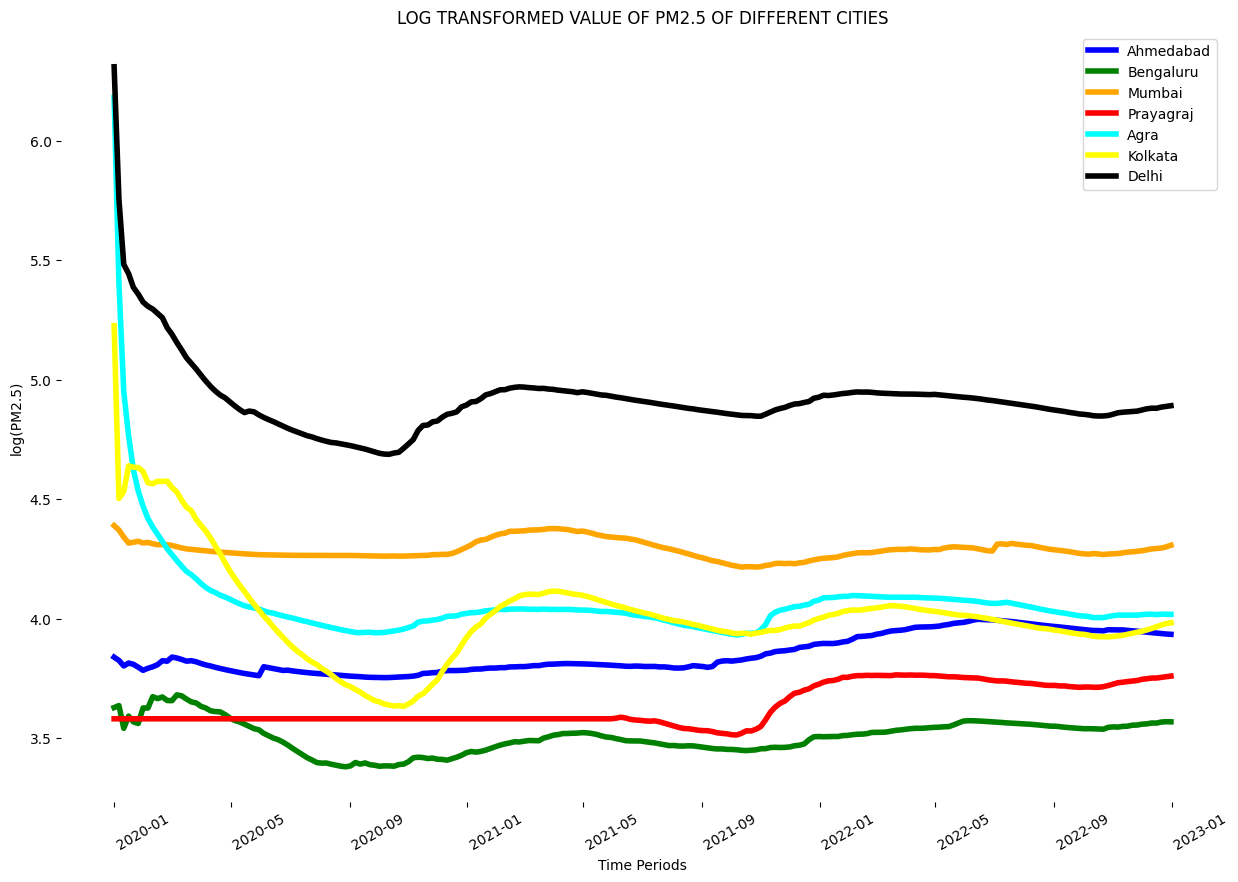

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
fig,ax = plt.subplots(figsize=(15, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 4})

sns.lineplot(x="Time Periods", y=np.log(df_Ahmedabad['PM2.5'].expanding().mean()), data=df_Ahmedabad.iloc[::30], color="b",label = 'Ahmedabad')
sns.lineplot(x="Time Periods", y=np.log(df_Bengaluru['PM2.5'].expanding().mean()), data=df_Bengaluru.iloc[::30], color="g",label = 'Bengaluru')
sns.lineplot(x="Time Periods", y=np.log(df_Mumbai['PM2.5'].expanding().mean()), data=df_Mumbai.iloc[::30], color="orange",label = 'Mumbai')
sns.lineplot(x="Time Periods", y=np.log(df_Prayagraj['PM2.5'].expanding().mean()), data=df_Prayagraj.iloc[::30], color="red",label = 'Prayagraj')
sns.lineplot(x="Time Periods", y=np.log(df_Agra['PM2.5'].expanding().mean()), data=df_Agra.iloc[::30], color="cyan",label = 'Agra')
sns.lineplot(x="Time Periods", y=np.log(df_Kolkata['PM2.5'].expanding().mean()), data=df_Kolkata.iloc[::30], color="yellow",label = 'Kolkata')
sns.lineplot(x="Time Periods", y=np.log(df_Delhi['PM2.5'].expanding().mean()), data=df_Delhi.iloc[::30], color="black",label = 'Delhi')


ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="left")
plt.rcParams["xtick.labelsize"] = 15

ax.set_title('LOG TRANSFORMED VALUE OF PM2.5 OF DIFFERENT CITIES')
ax.set_ylabel('log(PM2.5)')
ax.legend(fontsize=10)

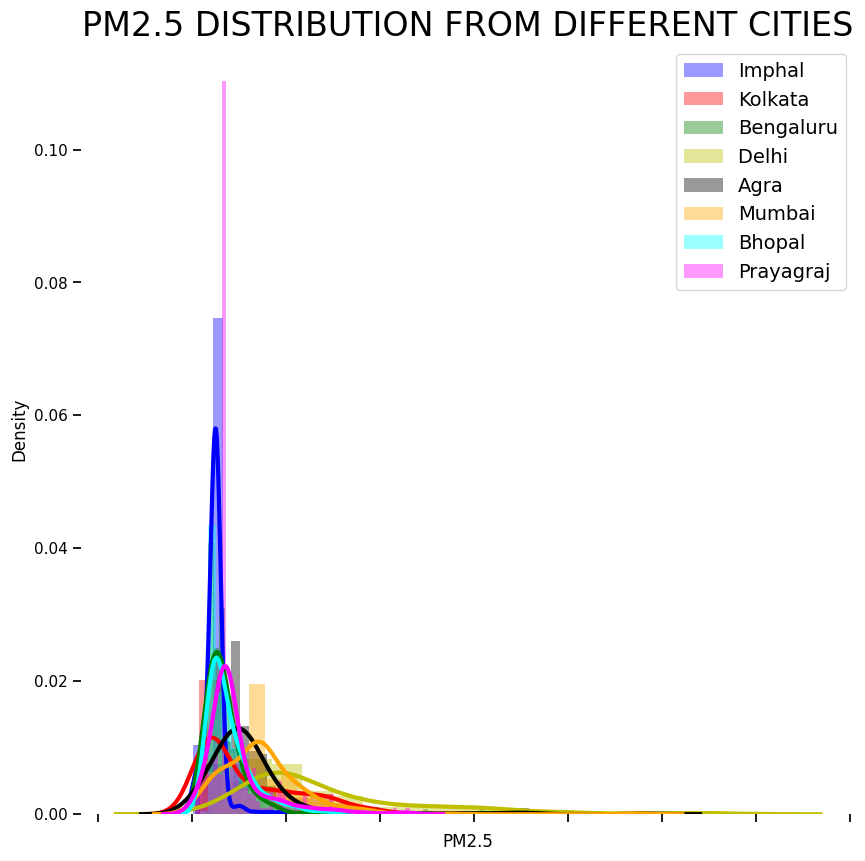

In [22]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})
labels = [item.get_text() for item in ax.get_xticklabels()]
sns.distplot(df_Imphal['PM2.5'].iloc[::30], color="blue",label = 'Imphal')
sns.distplot(df_Kolkata['PM2.5'].iloc  [::30], color="r",label = 'Kolkata')
sns.distplot(df_Bengaluru['PM2.5'].iloc[::30], color="g",label = 'Bengaluru')
sns.distplot(df_Delhi['PM2.5'].iloc[::30], color="y",label = 'Delhi    ')
sns.distplot(df_Agra['PM2.5'].iloc[::30], color="black",label = 'Agra')
sns.distplot(df_Mumbai['PM2.5'].iloc[::30], color="orange",label = 'Mumbai')
sns.distplot(df_Bhopal['PM2.5'].iloc[::30], color="cyan",label = 'Bhopal')
sns.distplot(df_Prayagraj['PM2.5'].iloc[::30], color="magenta",label = 'Prayagraj')

ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30,ha="left")
plt.rcParams["xtick.labelsize"] = 15

ax.set_title('PM2.5 DISTRIBUTION FROM DIFFERENT CITIES')
ax.legend(fontsize = 14)

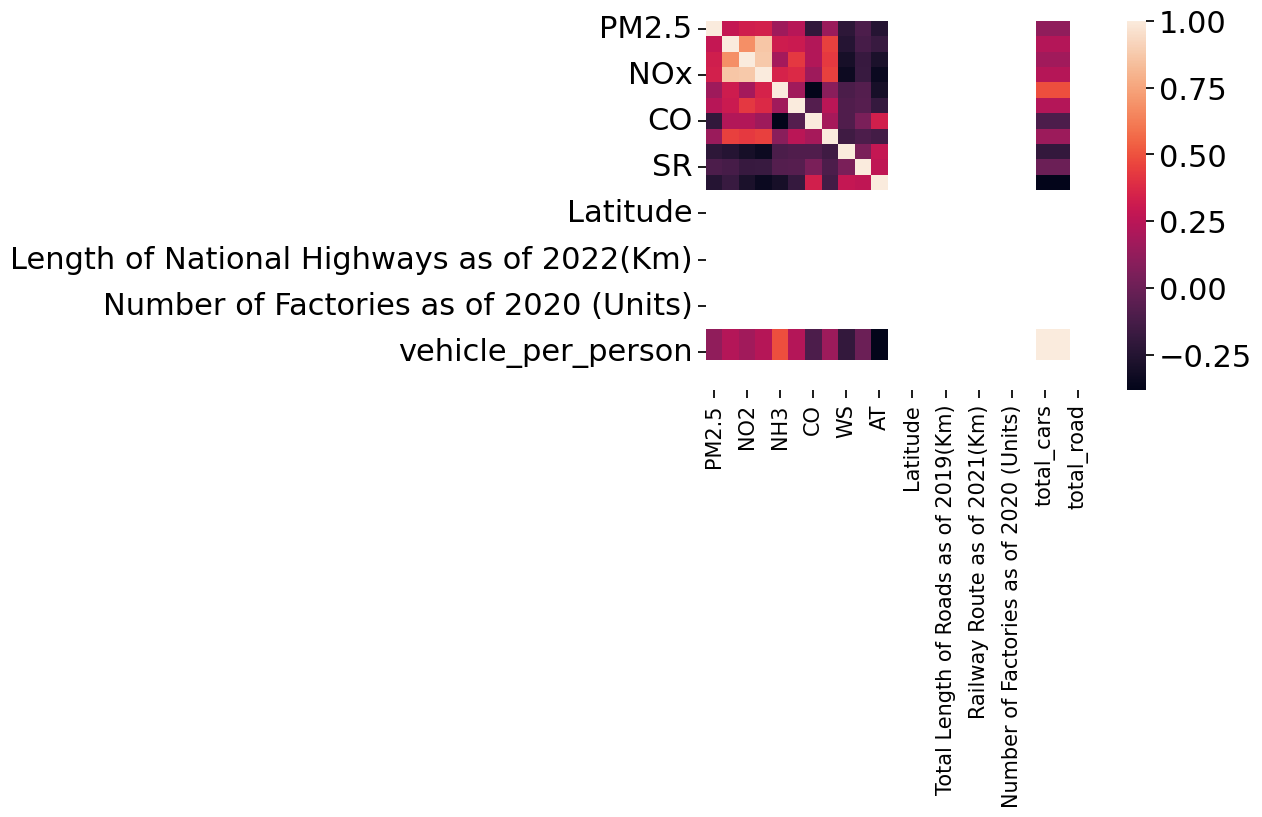

In [23]:
sns.heatmap(df_Ahmedabad.corr())
plt.show()

In [24]:
df_preprocess_final["total_cars"] = df_preprocess_final["total_cars"].astype(int)
# select the 10 specific columns and the target feature
cols_of_interest = ['NO', 'NOx', 'NO2', 'NH3', 'CO', 'Population as of 2021 (Estimated)','WS',
                    'Number of Factories as of 2020 (Units)', 'Railway Route as of 2021(Km)',
                    'Forest Cover as of 2021(sq Km)',
                     'SR', 'power_consumed_per_person']
target_feature = 'PM2.5'

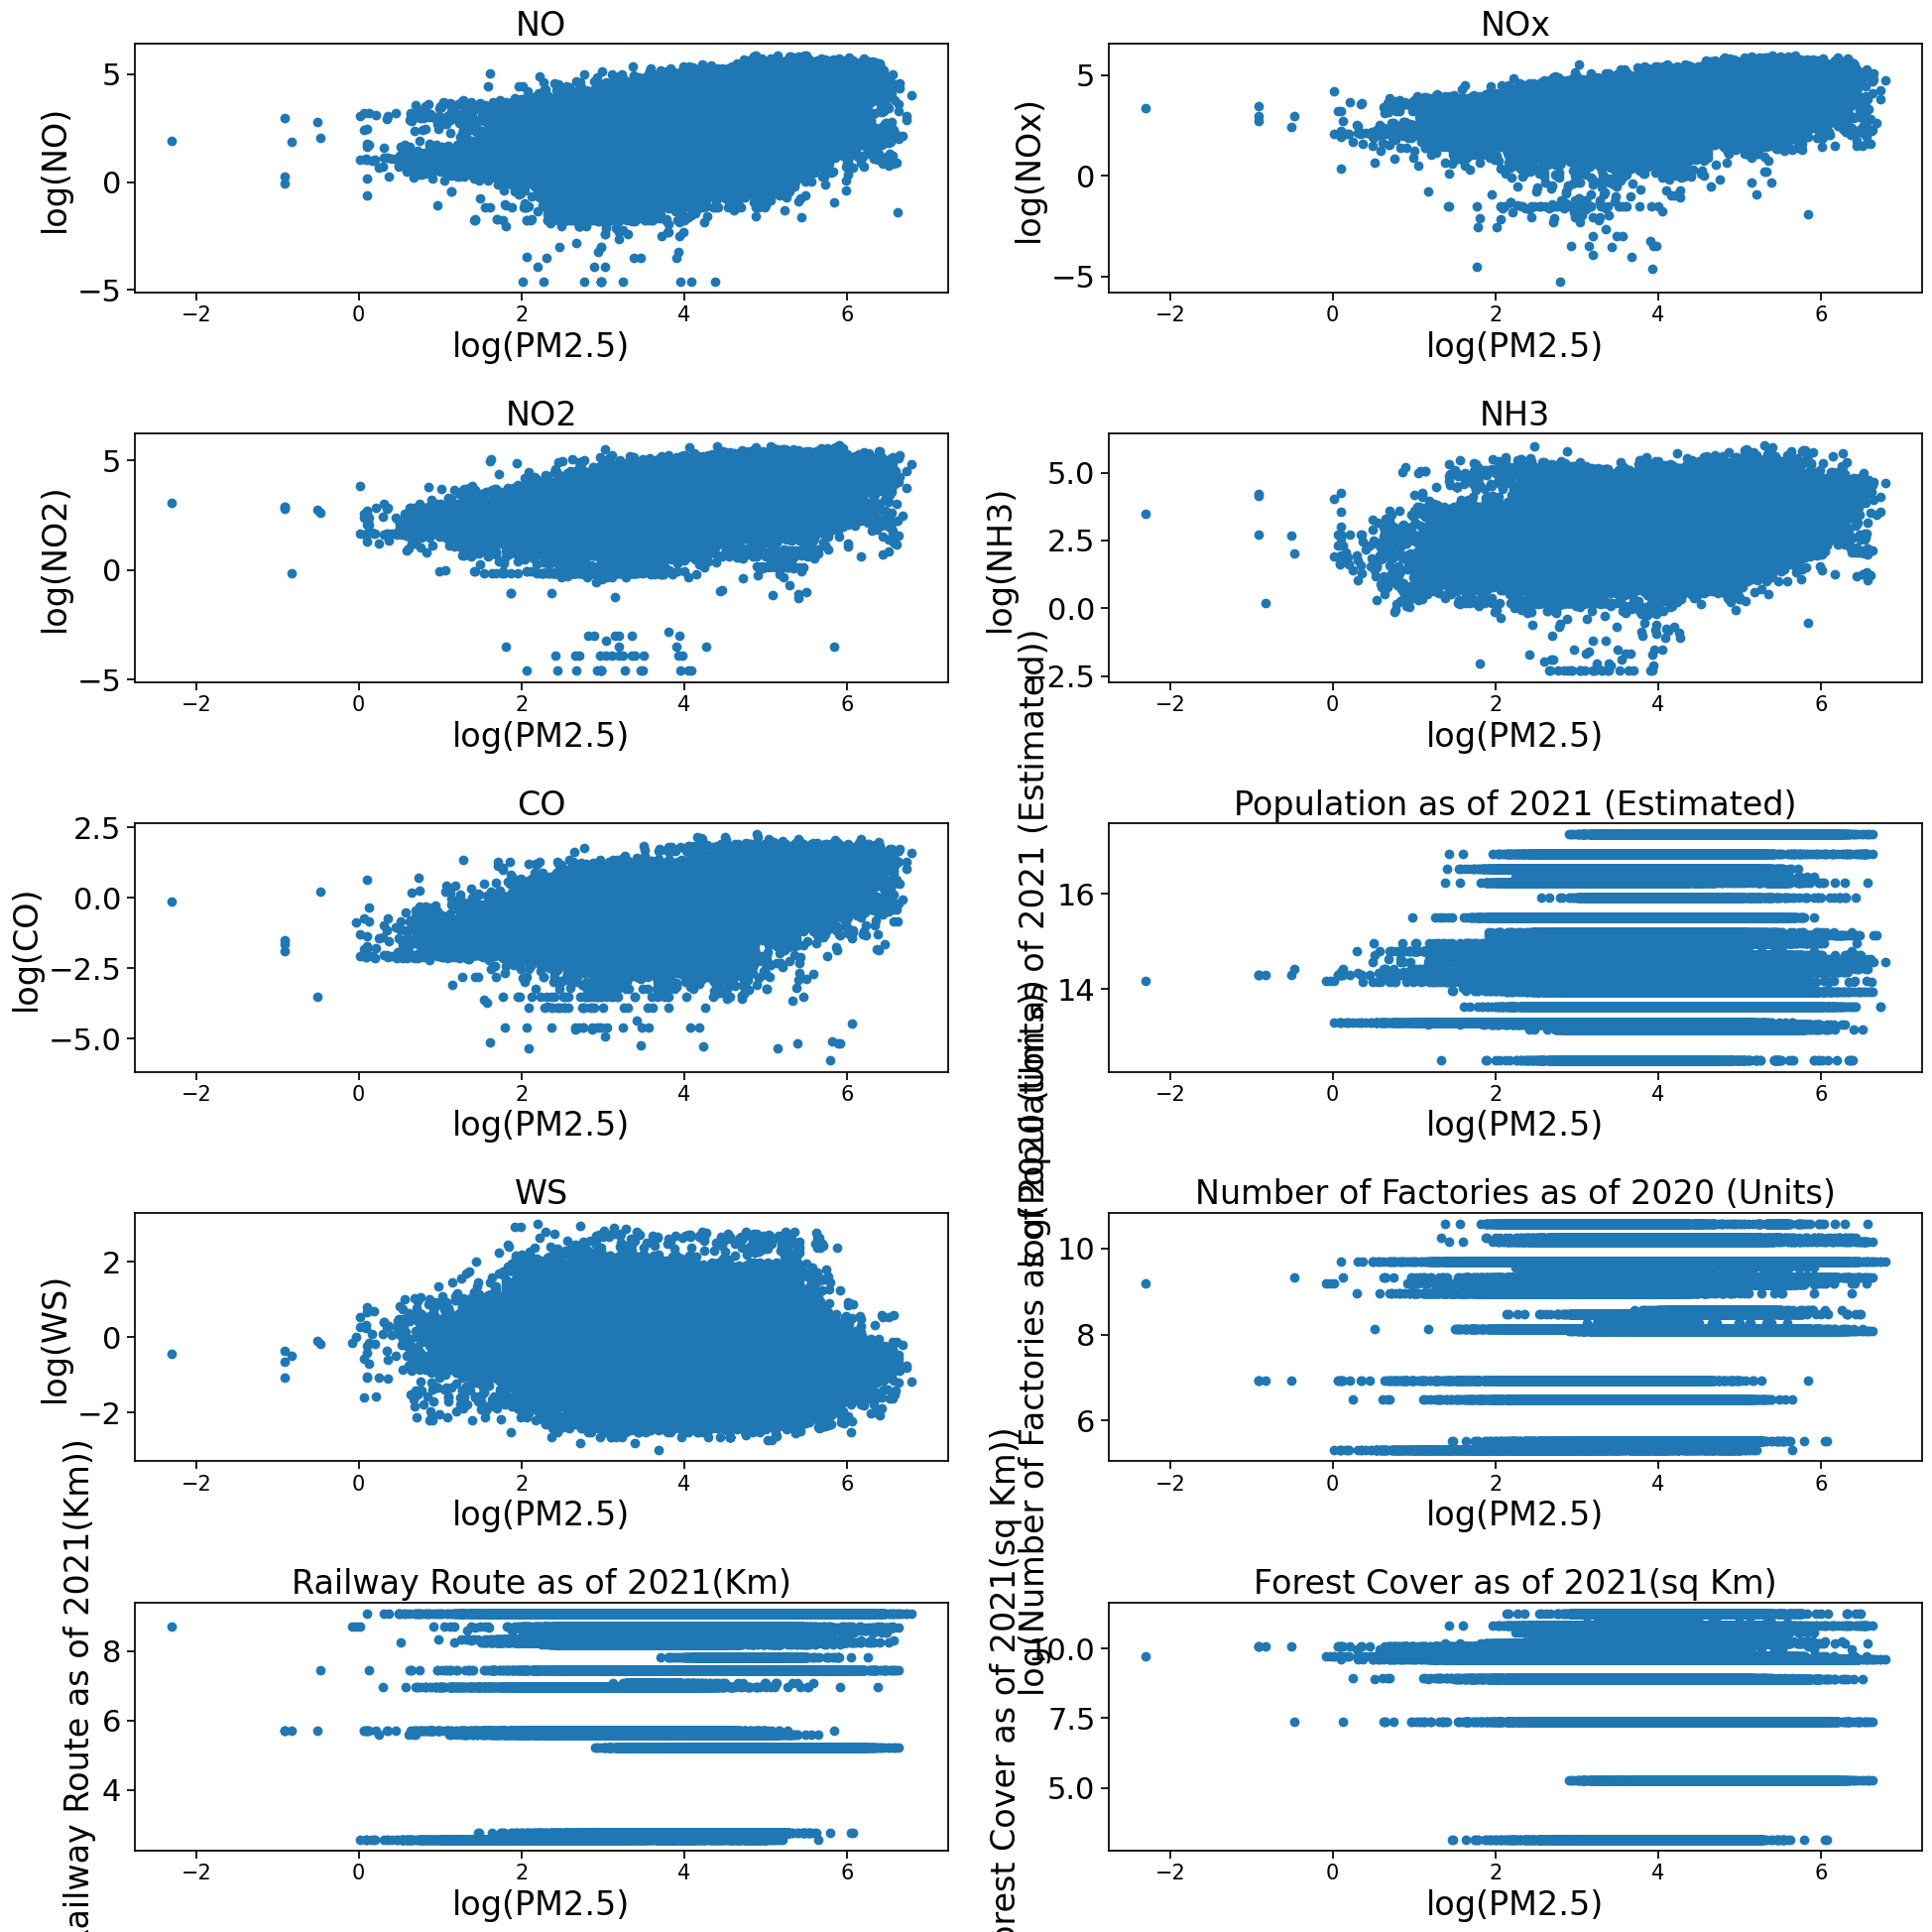

In [25]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))

# loop through the subplots and plot the scatter plots
for i, ax in enumerate(axes.flatten()):
    if i < len(cols_of_interest):
        col = cols_of_interest[i]
        x = np.log((df[target_feature]))
        y = np.log((df[col]))
        ax.scatter(x, y)
        ax.set_xlabel('log({})'.format(target_feature))
        ax.set_ylabel('log({})'.format(col))
        ax.set_title(col)
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

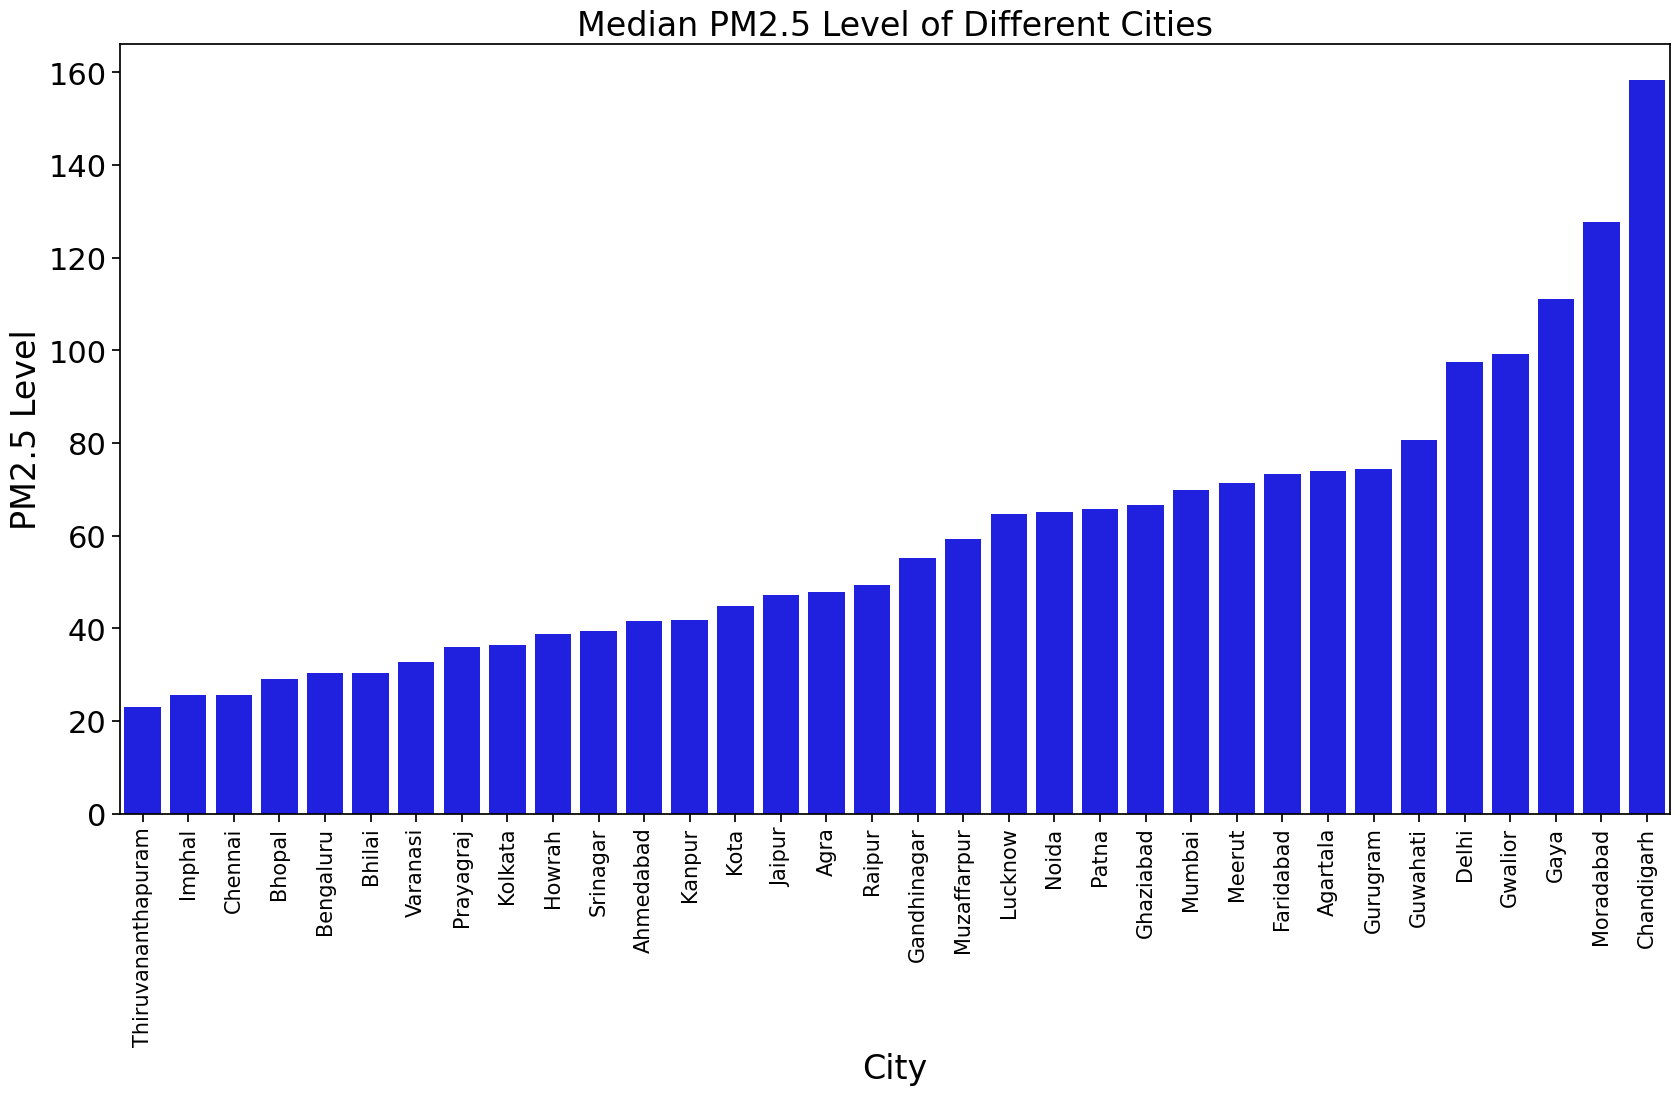

In [26]:
# create a new dataframe with median PM2.5 level of each city
median_pm25 = df_preprocess_final.groupby('City')['PM2.5'].median().reset_index()
median_pm25_sorted = median_pm25.sort_values("PM2.5")
# plot the barplot
plt.figure(figsize=(20,10))
sns.barplot(x='City', y='PM2.5', data=median_pm25_sorted, color='blue')
plt.title('Median PM2.5 Level of Different Cities')
plt.ylabel('PM2.5 Level')
plt.xlabel('City')
plt.xticks(rotation=90)
plt.show()

In [27]:
# pre covid and post covid 30 days duration
df_PM2 = df_preprocess_final.pivot(index='Time Periods', columns='City', values='PM2.5')
df_PM2 = df_PM2.fillna(df_PM2.median())
df_PM2.index = pd.to_datetime(df_PM2.index)
df_PM2_2020_05 = df_PM2.loc['2020-05-01 00:00':'2020-05-30 00:00']
df_PM2_2021_05 = df_PM2.loc['2021-05-01 00:00':'2021-05-30 00:00']

df_PM2_2020_05['Month'] = "A"
df_PM2_2021_05['Month'] = "B"

df_PM2_05 = pd.concat([df_PM2_2020_05,df_PM2_2021_05])

In [28]:
df_PM2_05

City,Agartala,Agra,Ahmedabad,Bengaluru,Bhilai,Bhopal,Chandigarh,Chennai,Delhi,Faridabad,...,Mumbai,Muzaffarpur,Noida,Patna,Prayagraj,Raipur,Srinagar,Thiruvananthapuram,Varanasi,Month
Time Periods,,,,,,,,,,,,,,,,,,,,,
2020-05-01 00:00:00,73.946201,47.985100,39.726516,36.436460,30.340937,29.353646,165.865676,7.522782,96.959214,26.435368,...,69.495002,48.035101,55.765228,22.900993,35.915508,49.243875,91.31,13.468930,32.422405,A
2020-05-01 04:00:00,73.946201,47.243166,39.022907,28.591619,30.340937,39.053245,168.987791,8.168869,95.642160,26.435368,...,69.566240,48.035101,63.881466,23.857557,35.915508,49.243875,91.31,16.113539,32.391895,A
2020-05-01 08:00:00,73.946201,48.179313,38.977251,31.312376,30.340937,31.857376,170.209767,10.223798,91.309610,26.435368,...,69.484145,48.035101,76.652857,23.682634,35.915508,49.243875,91.31,19.386610,32.233525,A
2020-05-01 12:00:00,73.946201,51.607487,38.990510,19.970022,30.340937,19.433318,166.846441,12.331264,88.565895,26.435368,...,69.829391,48.035101,76.459819,23.507711,35.915508,49.243875,91.31,19.909920,32.195237,A
2020-05-01 16:00:00,73.946201,45.951326,38.868197,26.540085,30.340937,20.649212,168.158212,21.138409,85.822180,26.435368,...,70.061050,48.035101,54.087156,23.332789,35.915508,49.243875,91.31,15.739255,32.207783,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-29 08:00:00,68.610052,39.703800,40.357472,18.828157,30.340937,22.871156,171.110751,215.484790,75.384241,21.216494,...,61.910962,79.165906,20.818676,15.421849,35.915508,49.243875,66.41,13.036244,30.049637,B
2021-05-29 12:00:00,70.645813,40.860345,39.086823,16.867358,30.340937,23.783406,163.730900,222.327016,66.376836,37.768232,...,56.623020,66.070325,18.318547,35.659131,35.915508,49.243875,65.02,17.917729,30.037707,B
2021-05-29 16:00:00,71.419907,41.715752,40.357881,15.818473,30.340937,22.206200,158.266937,221.679682,63.148270,53.238024,...,57.092970,69.193298,20.097868,29.956371,35.915508,49.243875,38.29,19.751709,29.217031,B


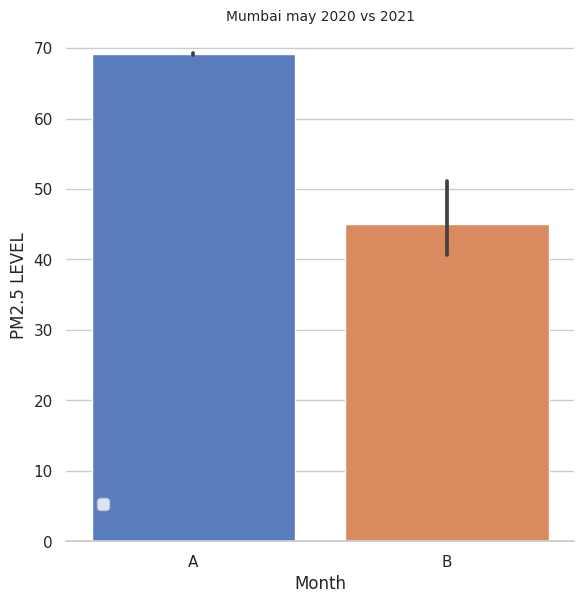

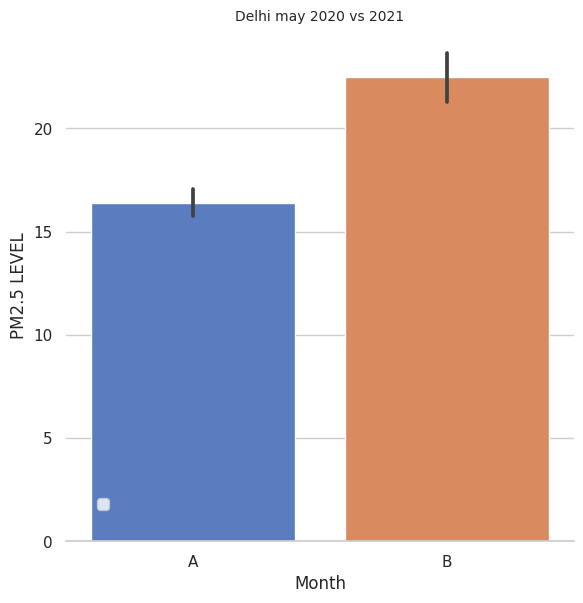

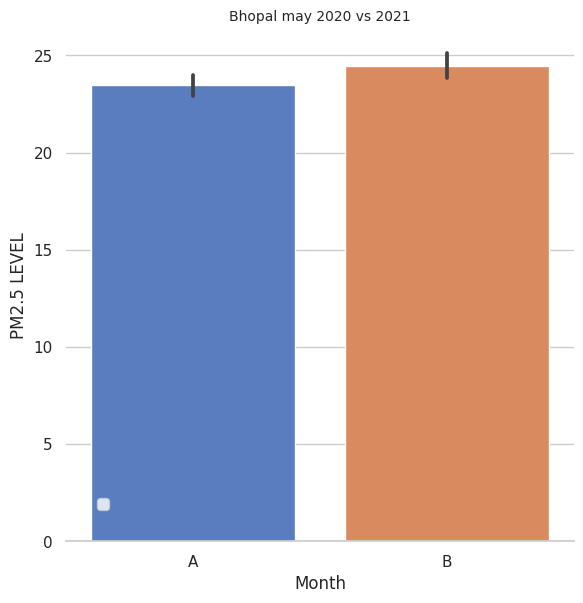

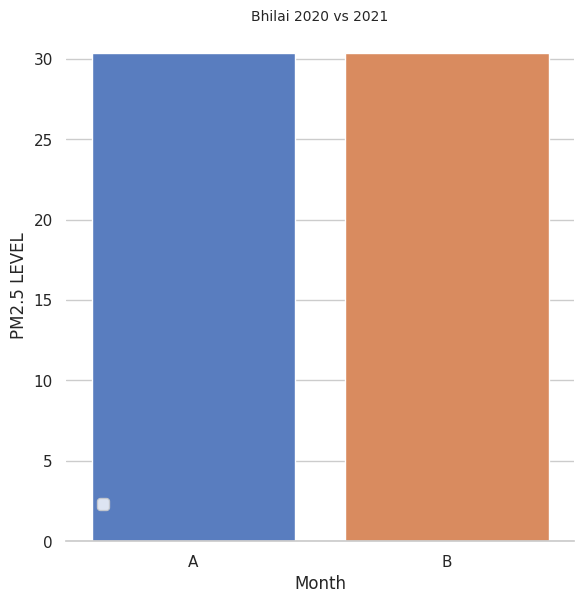

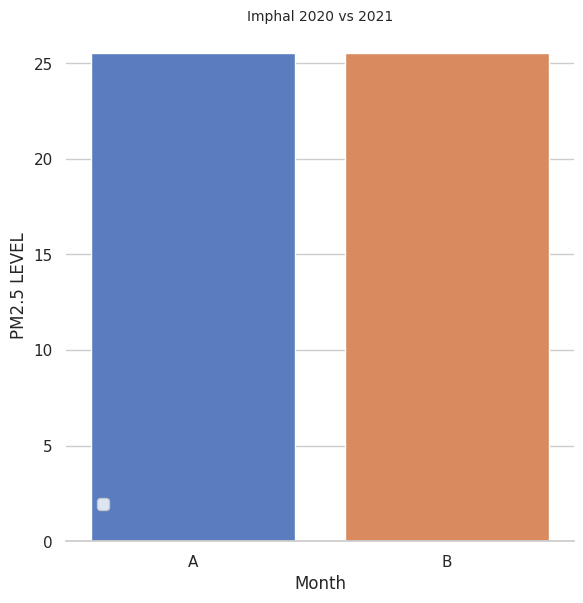

In [29]:
sns.set(style="whitegrid")

g = sns.catplot(x="Month", y="Mumbai", data=df_PM2_05,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("PM2.5 LEVEL")

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Mumbai may 2020 vs 2021",fontsize=10);

sns.set(style="whitegrid")

g = sns.catplot(x="Month", y="Kolkata", data = df_PM2_05,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("PM2.5 LEVEL")

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Delhi may 2020 vs 2021",fontsize=10);


sns.set(style="whitegrid")

g = sns.catplot(x="Month", y="Bhopal",
                data = df_PM2_05,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("PM2.5 LEVEL")

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Bhopal may 2020 vs 2021",
          fontsize=10);


sns.set(style="whitegrid")

g = sns.catplot(x="Month", y="Bhilai",
                data = df_PM2_05,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("PM2.5 LEVEL")

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Bhilai 2020 vs 2021",
          fontsize=10);

sns.set(style="whitegrid")

g = sns.catplot(x="Month", y="Imphal",
                data = df_PM2_05,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("PM2.5 LEVEL")

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Imphal 2020 vs 2021",
          fontsize=10);

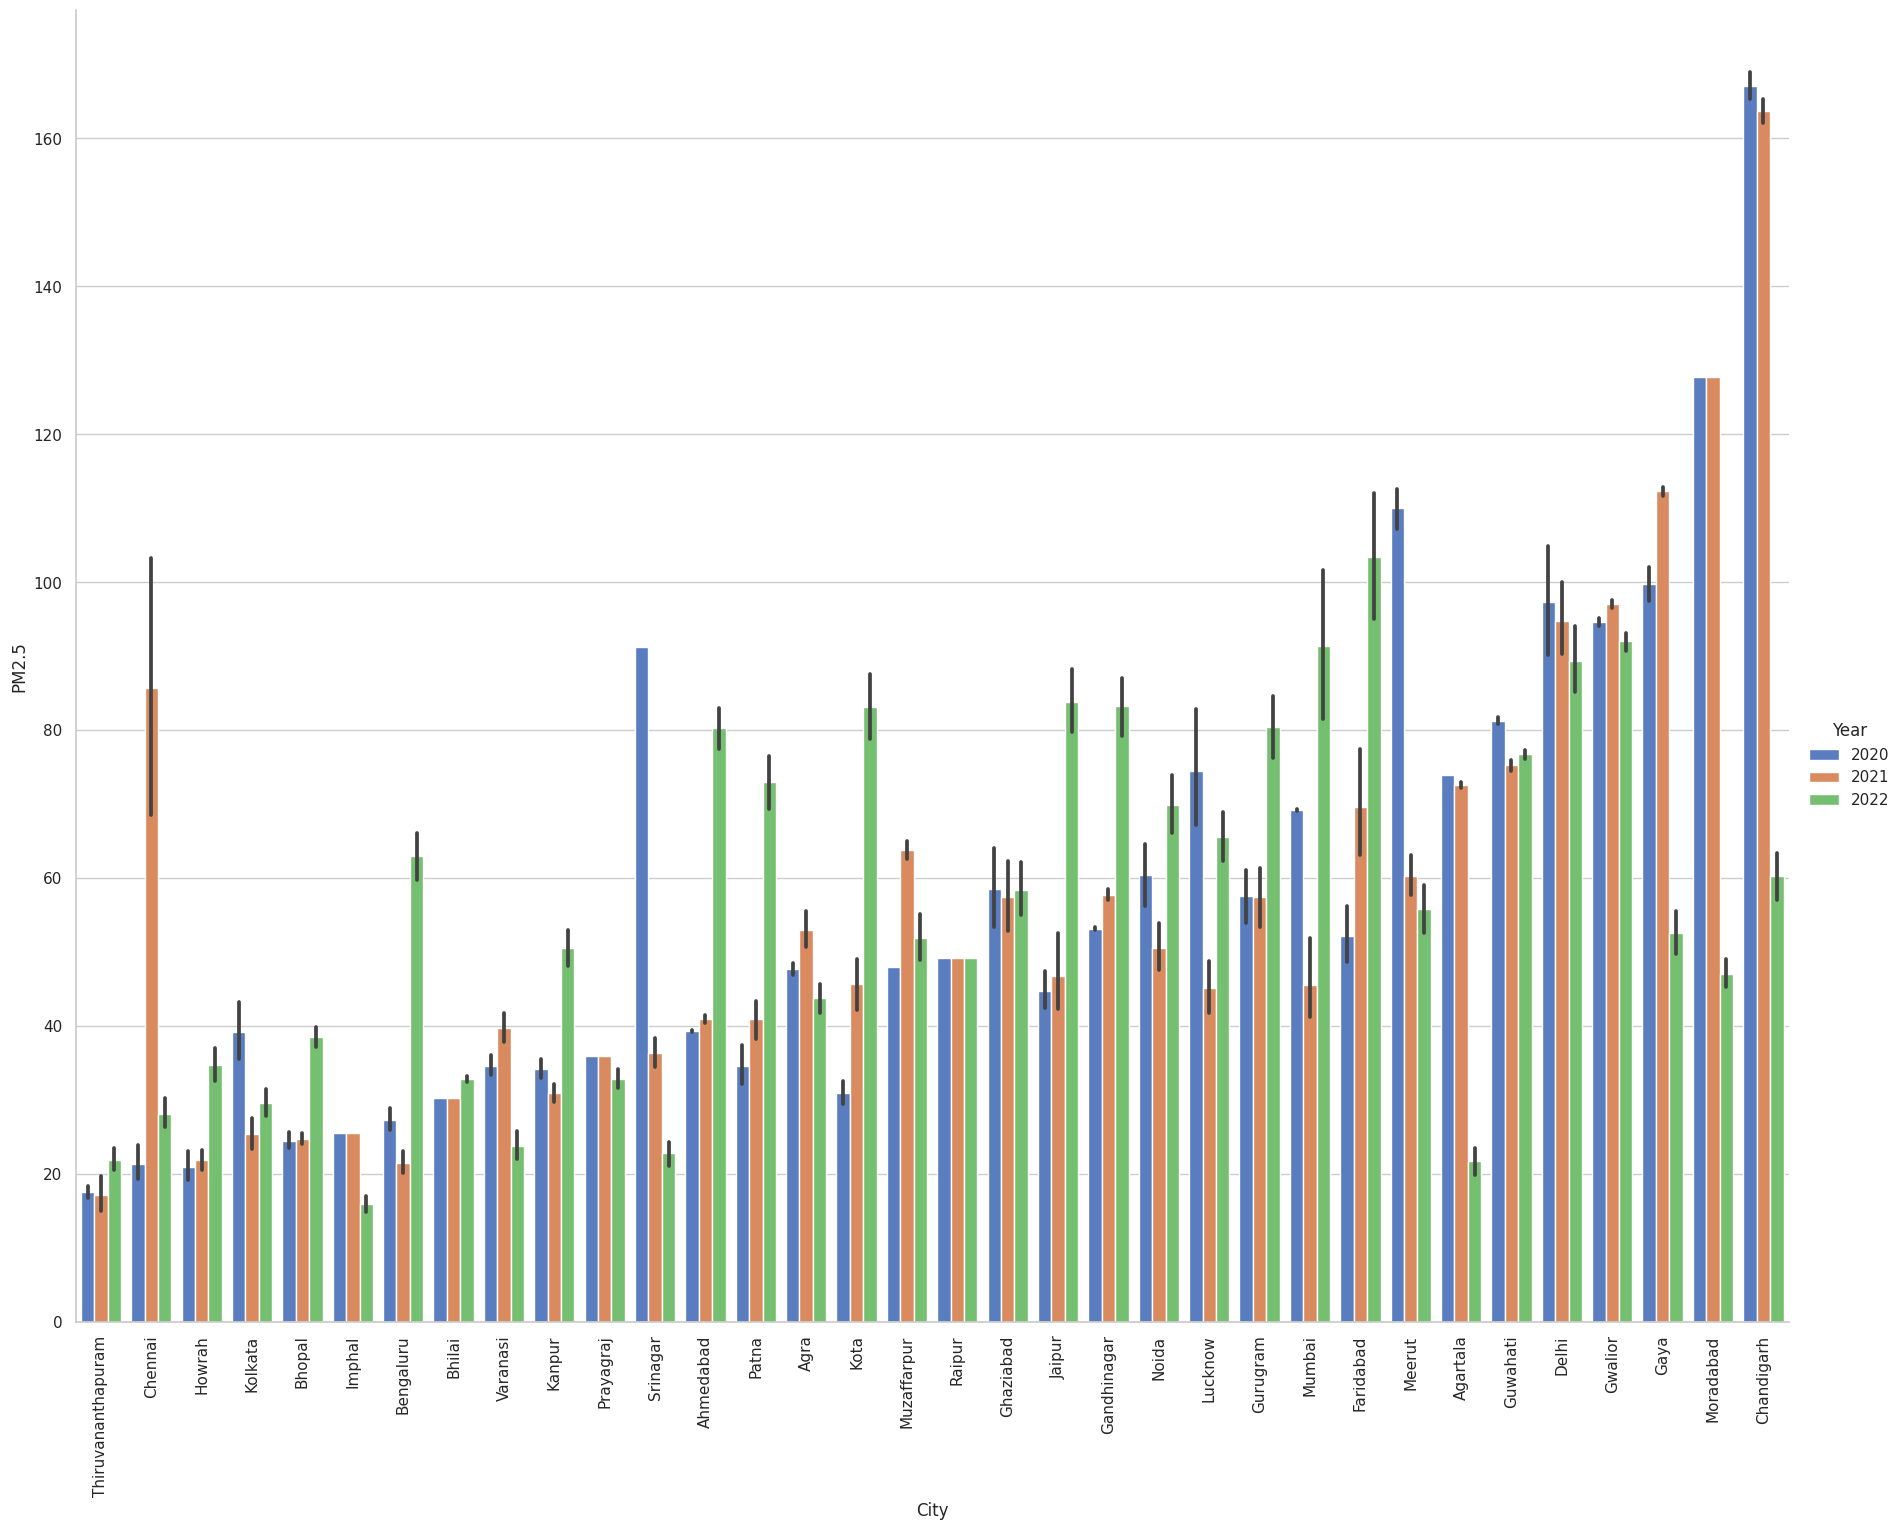

In [30]:
# city wise pm2.5 median value in 2020/21/22 in the month of may
df_covid_comp= pd.read_csv("air_pollution_dataset.csv",index_col="Time Periods")
df_covid_comp.fillna(df_covid_comp.mean(),inplace=True)
df_covid_comp.index = pd.to_datetime(df_covid_comp.index)

df_2020_05 = df_covid_comp.loc['2020-05-01':'2020-05-30']
df_2021_05 = df_covid_comp.loc['2021-05-01':'2021-05-30']
df_2022_05 = df_covid_comp.loc["2022-05-01":"2022-05-30"]

df_2020_05['Year'] = "2020"
df_2021_05['Year'] = "2021"
df_2022_05["Year"] = "2022"
df_comparison = pd.concat([df_2020_05,df_2021_05,df_2022_05])
# df_comparison.head()
chart = sns.catplot(x="City", y="PM2.5", hue="Year",
                    data=df_comparison, height=14,
                    aspect=1.3, kind="bar",
                    palette="muted",
                    order=df_comparison.groupby("City")["PM2.5"].median().sort_values().index);
chart.set_xticklabels(rotation=90);

In [31]:
def plot_feature_by_city(df, cities, month, year):
    """
    Plots the relation between the log-transformed feature and time for multiple cities and a specific time period.

    Args:
    df (pandas.DataFrame): DataFrame containing the data.
    cities (list): List of names of the cities to plot.
    month (int): Month of the time period to plot.
    year (int): Year of the time period to plot.
    """

    # Convert the 'time period' column to a pandas datetime object
    df['Time Periods'] = pd.to_datetime(df['Time Periods'], format='%Y-%m-%d %H:%M')

    # Apply a log transformation to the 'feature_x' column
    df['log_feature_x'] = np.log(df['PM2.5'])


    # Loop through each city and plot the corresponding data
    for city in cities:
        # Filter the data to include only the specified city
        city_data = df[df['City'] == city]

        # Filter the data to include only the specified month and year
        month_data = city_data[(city_data['Time Periods'].dt.month == month) & (city_data['Time Periods'].dt.year == year)]

        # Extract the timestamps and log-transformed feature values for the specified city
        timestamps = month_data['Time Periods']
        month_data["log_pm2.5"] = df["log_feature_x"].rolling(20, min_periods = 1).mean()
        feature_values = month_data["log_pm2.5"]
        # Create a line plot of log-transformed feature values against timestamps
        plt.plot(timestamps, feature_values, label=city, linewidth = 3)

    plt.title(f'Relation between Log-Transformed PM2.5 value vs Time (using SMA) for Multiple Cities in {month}/{year}')
    plt.xlabel('Timestamp')
    plt.ylabel('Log-Transformed PM2.5 Value')
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()

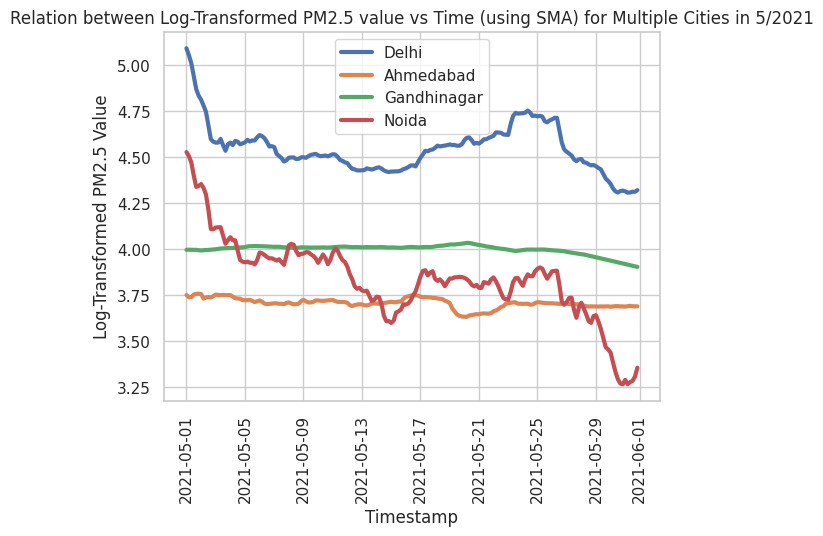

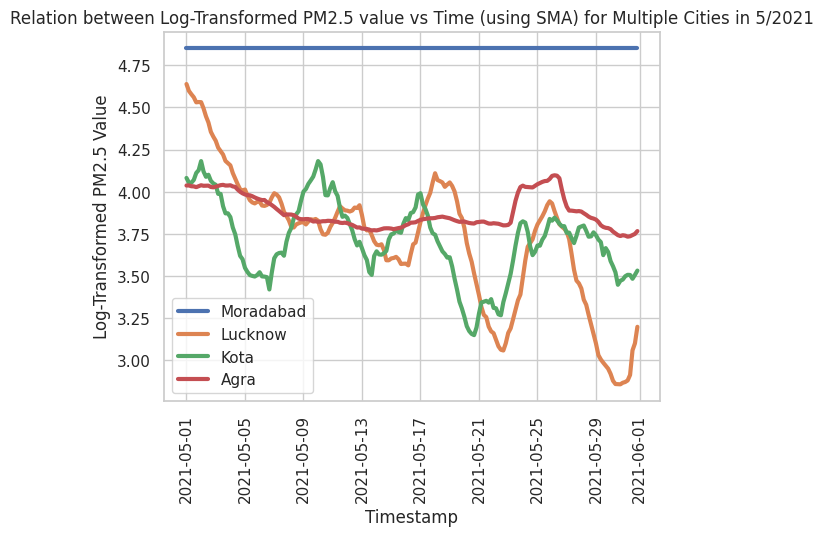

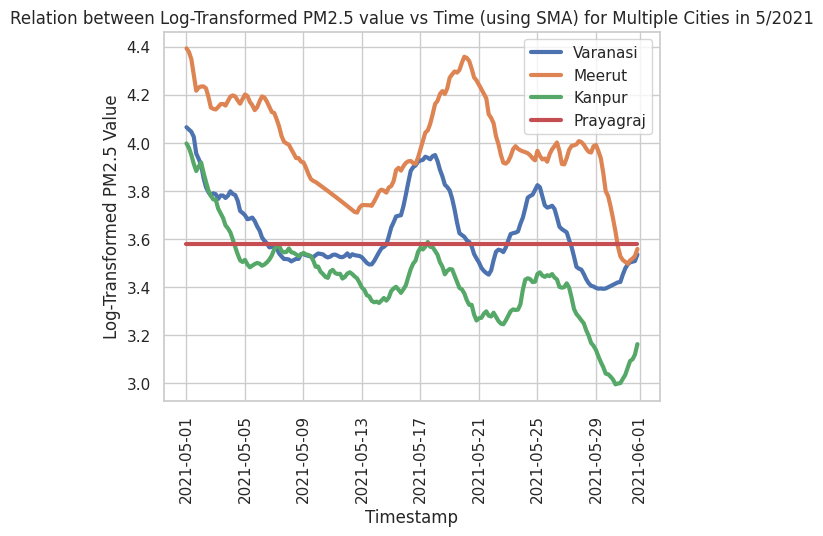

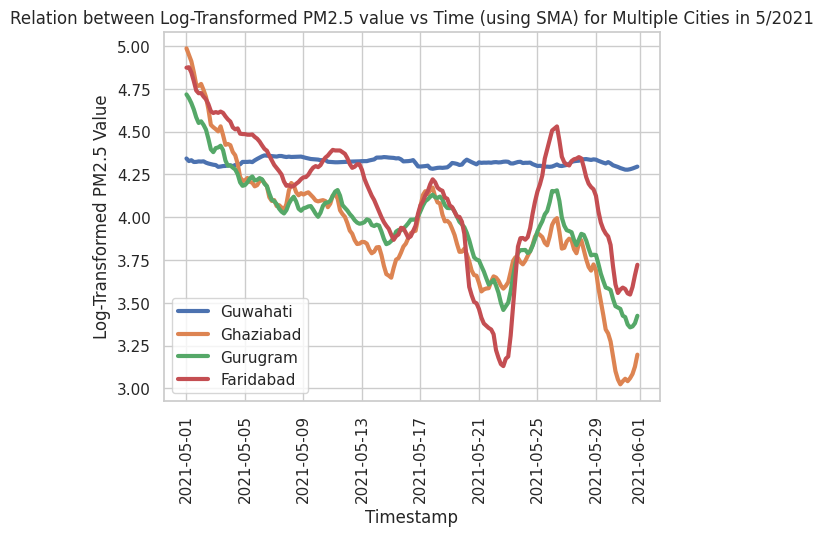

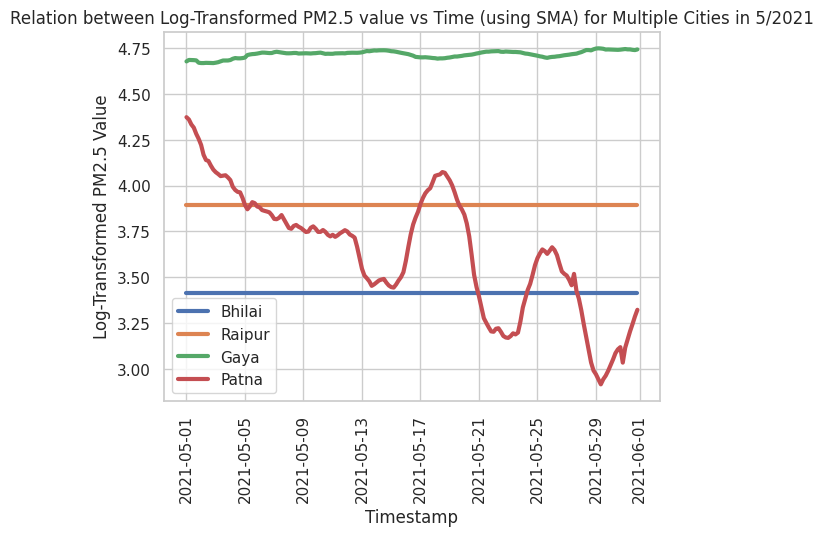

In [32]:
# we can identify multiple cities with flat data
df_processed_copy = df_preprocess_final.copy()
cities1 = ['Delhi', 'Ahmedabad', 'Gandhinagar','Noida']
cities2 = ['Moradabad', 'Lucknow', 'Kota', 'Agra']
cities3 = ['Varanasi','Meerut', 'Kanpur', 'Prayagraj']
cities4 = ['Guwahati', 'Ghaziabad', 'Gurugram', 'Faridabad']
cities5 = ['Bhilai','Raipur', 'Gaya', 'Patna']
plot_feature_by_city(df_processed_copy, cities1, 5, 2021)
plot_feature_by_city(df_processed_copy, cities2, 5, 2021)
plot_feature_by_city(df_processed_copy, cities3, 5, 2021)
plot_feature_by_city(df_processed_copy, cities4, 5, 2021)
plot_feature_by_city(df_processed_copy, cities5, 5, 2021)

In [33]:
df1 = pd.read_csv("air_pollution_dataset.csv")

# Convert the "Time Period" column to datetime format
df1["Time Periods"] = pd.to_datetime(df1["Time Periods"], format='%Y-%m-%d %H:%M')

# Extract the month and day from the "Time Period" column
df1["Month"] = df1["Time Periods"].dt.month
df1["Day"] = df1["Time Periods"].dt.day
df1["Year"] = df1["Time Periods"].dt.year

# Group the data by month, day, city, and state, and calculate the median pm2.5 value for each group
grouped = df1.groupby(["Month", "Day", "City", "State"]).median().reset_index()

# Group the data again by month and day, and calculate the median pm2.5 value for each group
monthly = grouped.groupby(["Month", "Day"]).median().reset_index()

grouped_ = df1.groupby(["Month","Year", "City", "Day","State"]).median().reset_index()
grouped_month_for_each_city = grouped_.groupby(["City","Year","Month"])["PM2.5"].median().reset_index()
grouped_month_for_each_city.head(10)
# print(len(grouped_month_for_each_city))

,City,Year,Month,PM2.5
0,Agartala,2020,1,73.946201
1,Agartala,2020,2,73.946201
2,Agartala,2020,3,73.946201
3,Agartala,2020,4,73.946201
4,Agartala,2020,5,73.946201
5,Agartala,2020,6,73.946201
6,Agartala,2020,7,73.946201
7,Agartala,2020,8,73.946201
8,Agartala,2020,9,73.946201
9,Agartala,2020,10,73.946201


In [34]:
df_coords = df1[['City', 'Latitude', 'Longitude']].drop_duplicates()
# new_df.head()
df_avg = df1.groupby(["City","Year", "Month"])["PM2.5"].mean().reset_index()
# df_avg_31 = df_avg[df_avg['Day'] <= 31]
df_map = pd.merge(df_avg, df_coords, on='City', how='left')
df_map.head()

,City,Year,Month,PM2.5,Latitude,Longitude
0,Agartala,2020,1,73.946201,23.836,91.279
1,Agartala,2020,2,73.946201,23.836,91.279
2,Agartala,2020,3,73.946201,23.836,91.279
3,Agartala,2020,4,73.946201,23.836,91.279
4,Agartala,2020,5,73.946201,23.836,91.279


In [35]:
!pip install folium

In [36]:
import folium

In [37]:
from folium.plugins import HeatMap

In [38]:
def display_on_map(year, month):
    df_heatmap = df_map[(df_map['Year'] == year) & (df_map['Month'] == month)]
    m1 = folium.Map(location=[20.5937, 78.9629], zoom_start=2)
    HeatMap(data=df_heatmap[['Latitude', 'Longitude', 'PM2.5']].values, radius=12, max_zoom=10).add_to(m1)
    display(m1)

display_on_map(2022, 10)
display_on_map(2021, 11)
display_on_map(2020, 6)

In [39]:
df_preprocess['Time Periods'] = pd.to_datetime(df_preprocess['Time Periods'])
cities = list(df_preprocess['City'].unique())
df_ = {}

for i in cities:
    df_[str(i)] = df_preprocess[df_preprocess['City'] == i]
    df_[str(i)] = df_[str(i)].drop(['City'],axis=1)

In [40]:
df_

{'Delhi':            PM2.5          NO         NO2         NOx        NH3        SO2  \
 0     549.256878  181.010975   91.247522  188.364425  79.707417  10.175812   
 1     435.438303  194.247049   79.661701  203.481853  66.258913  11.615925   
 2     453.312378  112.499494  121.740909  153.914993  74.356791  10.590183   
 3     186.603123   56.922094  114.142207   91.504524  73.426315  12.217971   
 4     262.616309   77.363086  123.790340  117.065760  72.495838  13.331616   
 ...          ...         ...         ...         ...        ...        ...   
 6571  196.175491   52.489249   44.330505   45.859306  54.634551   9.123839   
 6572  116.911632   44.449446   47.760942   35.195136  60.027847  11.825594   
 6573   90.348195   44.880417   39.679084   29.945022  61.151805  11.122274   
 6574  128.424548   59.451189   55.696476   52.401969  63.372069  12.646547   
 6575  163.290713   70.097090   56.231357   64.130862  56.242020  13.827596   
 
             CO   Benzene        WS      

In [41]:
df_delhi = df_["Delhi"]

In [42]:
df_delhi

,PM2.5,NO,NO2,NOx,NH3,SO2,CO,Benzene,WS,SR,...,Installed Capacity of Power as of 2022(Megawatt),Death Rate as of 2020(Per 1000),CNG ONLY,DIESEL,DIESEL/HYBRID,ELECTRIC(BOV),PETROL,PETROL/CNG,PETROL/HYBRID,Time Periods
0,549.256878,181.010975,91.247522,188.364425,79.707417,10.175812,3.520142,9.827428,0.253857,9.051957,...,7617,3.6,13968.0,10528.0,32,12379.0,360440.0,21424.0,5313.0,2020-01-01 00:00:00
1,435.438303,194.247049,79.661701,203.481853,66.258913,11.615925,3.464807,9.827428,0.233245,20.697426,...,7617,3.6,13968.0,10528.0,32,12379.0,360440.0,21424.0,5313.0,2020-01-01 04:00:00
2,453.312378,112.499494,121.740909,153.914993,74.356791,10.590183,2.460498,9.085975,0.805488,258.230668,...,7617,3.6,13968.0,10528.0,32,12379.0,360440.0,21424.0,5313.0,2020-01-01 08:00:00
3,186.603123,56.922094,114.142207,91.504524,73.426315,12.217971,1.405930,3.884649,1.160145,270.598584,...,7617,3.6,13968.0,10528.0,32,12379.0,360440.0,21424.0,5313.0,2020-01-01 12:00:00
4,262.616309,77.363086,123.790340,117.065760,72.495838,13.331616,2.692100,5.605006,0.374948,41.110706,...,7617,3.6,13968.0,10528.0,32,12379.0,360440.0,21424.0,5313.0,2020-01-01 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6571,196.175491,52.489249,44.330505,45.859306,54.634551,9.123839,1.950099,4.696621,0.881254,8.552536,...,7617,3.6,33850.0,15615.0,18,62262.0,451039.0,32575.0,13101.0,2022-12-31 04:00:00
6572,116.911632,44.449446,47.760942,35.195136,60.027847,11.825594,1.829944,3.448485,1.309110,113.695562,...,7617,3.6,33850.0,15615.0,18,62262.0,451039.0,32575.0,13101.0,2022-12-31 08:00:00
6573,90.348195,44.880417,39.679084,29.945022,61.151805,11.122274,1.485238,3.573461,1.299637,161.141675,...,7617,3.6,33850.0,15615.0,18,62262.0,451039.0,32575.0,13101.0,2022-12-31 12:00:00
6574,128.424548,59.451189,55.696476,52.401969,63.372069,12.646547,1.934671,3.725511,0.596960,17.547051,...,7617,3.6,33850.0,15615.0,18,62262.0,451039.0,32575.0,13101.0,2022-12-31 16:00:00


In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  ['PM2.5','NO','NO2','NOx','NH3','SO2','CO','Benzene','WS','SR','AT']

for column in core_columns:
    decomp = seasonal_decompose(df_delhi[column], period=52, model='additive', extrapolate_trend='freq')
    df_delhi[f"{column}_trend"] = decomp.trend
    df_delhi[f"{column}_seasonal"] = decomp.seasonal

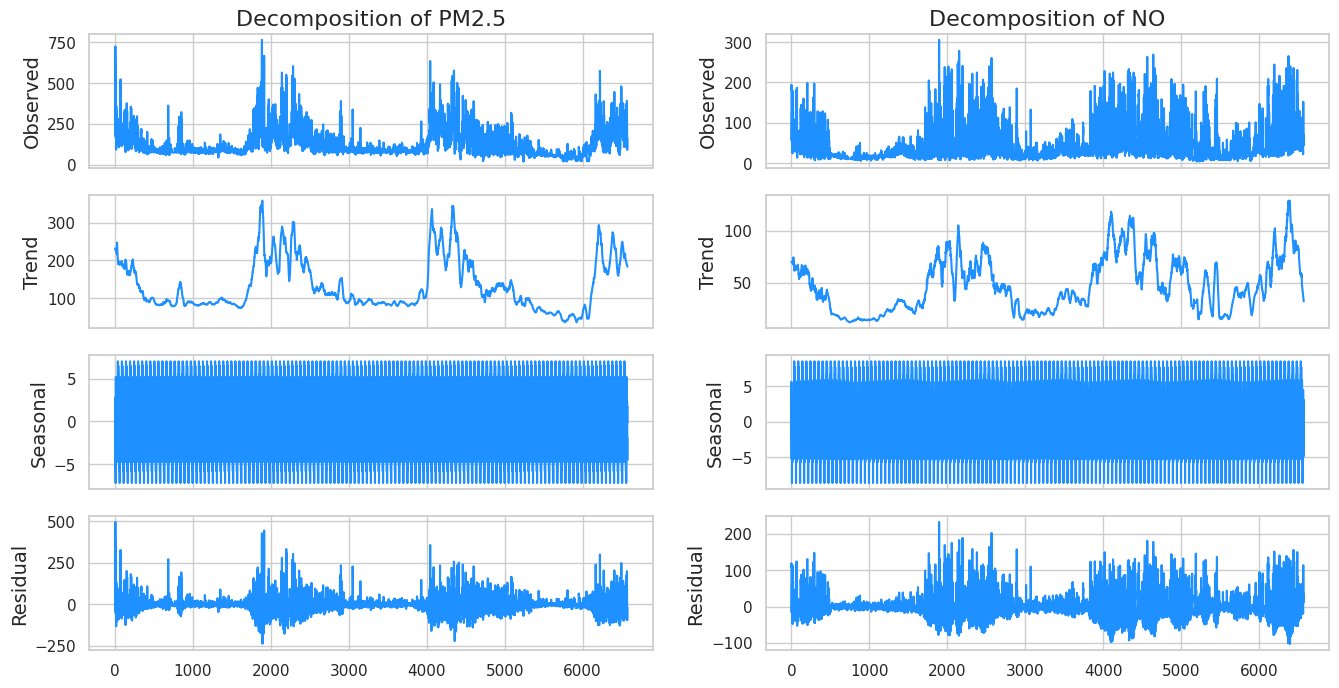

In [44]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['PM2.5', 'NO']):

    res = seasonal_decompose(df_delhi[column], period=52, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)

    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

In [45]:
!pip install prophet

In [46]:
df_delhi_prophet = df_delhi[["PM2.5","Time Periods"]]
df_delhi_prophet.rename(columns = {'PM2.5':'y','Time Periods':'ds'}, inplace=True)

In [47]:
from prophet import Prophet

m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df_delhi_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmplevdum1u/2wekp18l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplevdum1u/taprmyyh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58299', 'data', 'file=/tmp/tmplevdum1u/2wekp18l.json', 'init=/tmp/tmplevdum1u/taprmyyh.json', 'output', 'file=/tmp/tmplevdum1u/prophet_modeltmk0ijqj/prophet_model-20230807130936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [48]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01 00:00:00,131.202414,139.542426,362.101334,131.202414,131.202414,118.298825,118.298825,118.298825,11.982113,...,-1.445425,-1.445425,-1.445425,107.762137,107.762137,107.762137,0.0,0.0,0.0,249.501239
1,2020-01-01 04:00:00,131.171358,128.200931,360.402217,131.171358,131.171358,114.700616,114.700616,114.700616,9.621006,...,-2.197279,-2.197279,-2.197279,107.276889,107.276889,107.276889,0.0,0.0,0.0,245.871974
2,2020-01-01 08:00:00,131.140302,129.933475,359.063122,131.140302,131.140302,111.029640,111.029640,111.029640,6.907244,...,-2.663083,-2.663083,-2.663083,106.785479,106.785479,106.785479,0.0,0.0,0.0,242.169942
3,2020-01-01 12:00:00,131.109246,96.697320,320.067010,131.109246,131.109246,75.620528,75.620528,75.620528,-27.949126,...,-2.718493,-2.718493,-2.718493,106.288146,106.288146,106.288146,0.0,0.0,0.0,206.729774
4,2020-01-01 16:00:00,131.078191,91.895425,326.958650,131.078191,131.078191,81.610415,81.610415,81.610415,-21.866873,...,-2.307846,-2.307846,-2.307846,105.785134,105.785134,105.785134,0.0,0.0,0.0,212.688606


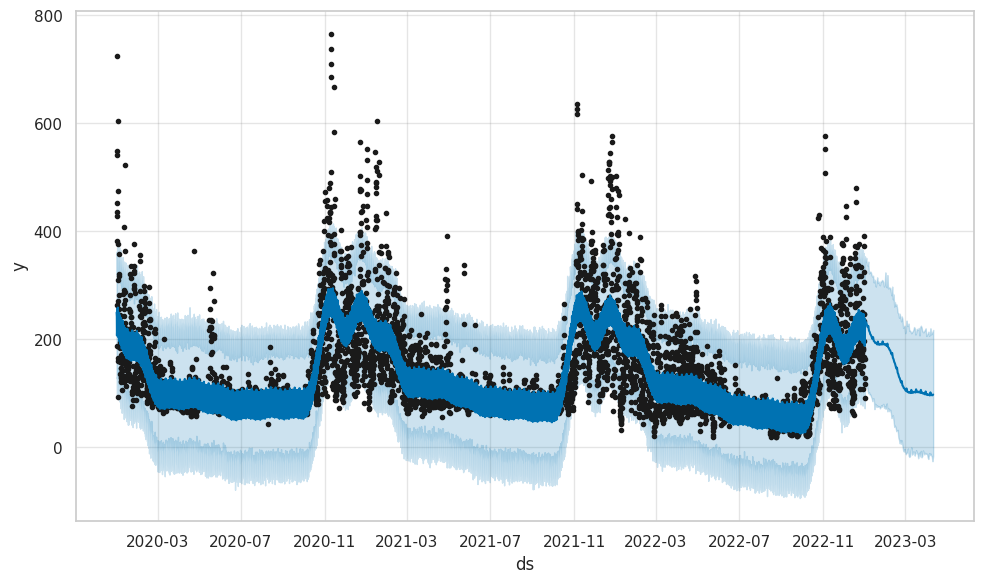

In [49]:
plot1 = m.plot(forecast)

In [50]:
train_size = int(0.85 * len(df_['Kolkata']))
test_size = len(df) - train_size

univariate_df = df_['Kolkata'][['Time Periods', 'PM2.5']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

5589 987


In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

from prophet import Prophet


# Train the model
model = Prophet()
model.fit(train)

# x_valid = model.make_future_dataframe(periods=test_size, freq='w')

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred.tail(test_size)['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred.tail(test_size)['yhat']))

DEBUG:cmdstanpy:input tempfile: /tmp/tmplevdum1u/38kv5adr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplevdum1u/5zu79utu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89265', 'data', 'file=/tmp/tmplevdum1u/38kv5adr.json', 'init=/tmp/tmplevdum1u/5zu79utu.json', 'output', 'file=/tmp/tmplevdum1u/prophet_modelqqi9gdmv/prophet_model-20230807130941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [52]:
!pip install colorama
import colorama
from colorama import Fore
print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

RMSE: 25.207753710641143


In [53]:
!pip install ThymeBoost --upgrade

In [54]:
df_['Kolkata'].index = df_['Kolkata']['Time Periods']
y = df_['Kolkata']['PM2.5']

In [55]:
y

Time Periods
2020-01-01 00:00:00    185.967507
2020-01-01 04:00:00    142.320115
2020-01-01 08:00:00    121.399813
2020-01-01 12:00:00     91.688479
2020-01-01 16:00:00     91.537256
                          ...    
2022-12-31 04:00:00    138.332463
2022-12-31 08:00:00    126.975989
2022-12-31 12:00:00    108.334425
2022-12-31 16:00:00    109.961249
2022-12-31 20:00:00    128.594241
Name: PM2.5, Length: 6576, dtype: float64

In [56]:
test_len = int(len(y) * 0.3)
al_train, al_test = y.iloc[:-test_len], y.iloc[-test_len:]

In [57]:
from ThymeBoost import ThymeBoost as tb

boosted_model = tb.ThymeBoost(verbose=0)
output = boosted_model.autofit(al_train)
#                                ,seasonal_period=12)
predicted_output = boosted_model.predict(output, len(al_test))
tb_mae = np.mean(np.abs(al_test - predicted_output['predictions']))
tb_rmse = (np.mean((al_test - predicted_output['predictions'])**2))**.5
tb_mape = np.sum(np.abs(predicted_output['predictions'] - al_test)) / (np.sum((np.abs(al_test))))

100%|██████████| 5/5 [02:27<00:00, 29.41s/it]


Optimal model configuration: {'trend_estimator': 'arima', 'fit_type': 'global', 'seasonal_period': 0, 'arima_order': 'auto', 'seasonal_estimator': 'fourier', 'global_cost': 'mse', 'additive': False, 'exogenous': None}
Params ensembled: False


In [58]:
predicted_output.tail()

,predictions,predicted_trend,predicted_seasonality,predicted_exogenous,predicted_upper,predicted_lower
2022-12-31 04:00:00,70.428254,70.428254,1.0,1.0,205.565093,-64.708584
2022-12-31 08:00:00,70.427594,70.427594,1.0,1.0,205.603034,-64.747845
2022-12-31 12:00:00,70.424937,70.424937,1.0,1.0,205.638977,-64.789103
2022-12-31 16:00:00,70.427862,70.427862,1.0,1.0,205.680503,-64.824779
2022-12-31 20:00:00,70.427713,70.427713,1.0,1.0,205.718954,-64.863529


In [59]:
tb_rmse

45.42585167086314

In [60]:
from sklearn.preprocessing import MinMaxScaler

data = univariate_df.filter(['y'])
#Convert the dataframe to a numpy array
dataset = data.values

scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)

scaled_data[:10]

array([[-0.39371441],
       [-0.53919353],
       [-0.60892202],
       [-0.70795151],
       [-0.70845554],
       [-0.63140562],
       [-0.55435569],
       [-0.62764678],
       [-0.61703606],
       [-0.68354785]])

In [61]:
# Defines the rolling window
look_back = 52
# Split into train and test sets
train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

5485 987


In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size=1, epochs=2, validation_data=(x_test, y_test))

# Print model summary
model.summary()

Epoch 1/2
5485/5485 [==============================] - 57s 9ms/step - loss: 0.0078 - val_loss: 0.0022
Epoch 2/2
5485/5485 [==============================] - 37s 7ms/step - loss: 0.0035 - val_loss: 0.0017
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             20600     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 42,101
Trainable params: 42,101
Non-trainable params: 0
______________________________________________

In [63]:
'''# bidirectional model
from tensorflow.keras.layers import Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')'''

"# bidirectional model\nfrom tensorflow.keras.layers import Bidirectional\n\nmodel = Sequential()\nmodel.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(x_train.shape[1], x_train.shape[2])))\nmodel.add(Dense(1))\nmodel.compile(optimizer='adam', loss='mse')"

In [64]:
from sklearn.metrics import mean_squared_error

In [65]:
# Make predictions using the trained model
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Get the root mean squared error (RMSE) and MAE
score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,0])
print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

31/31 [==============================] - 0s 2ms/step
RMSE: 12.4440848361011


Text(0, 0.5, 'Depth to Groundwater')

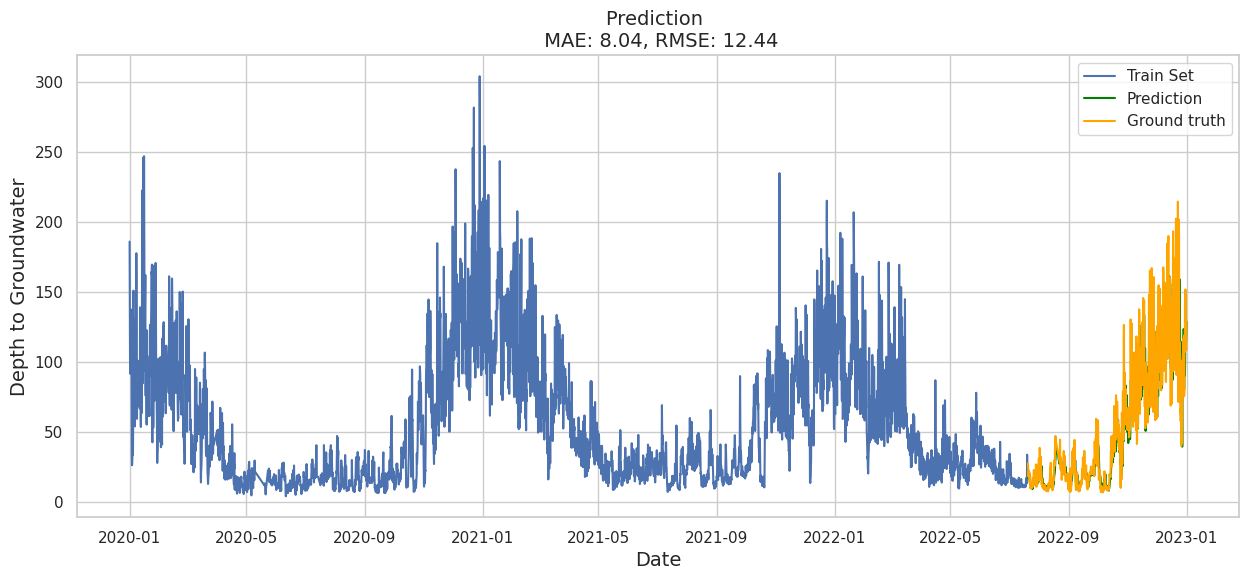

In [66]:
x_train_ticks = univariate_df.head(train_size)['ds']
y_train = univariate_df.head(train_size)['y']
x_test_ticks = univariate_df.tail(987)['ds']

# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='Train Set') #navajowhite
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)


# RESULTS

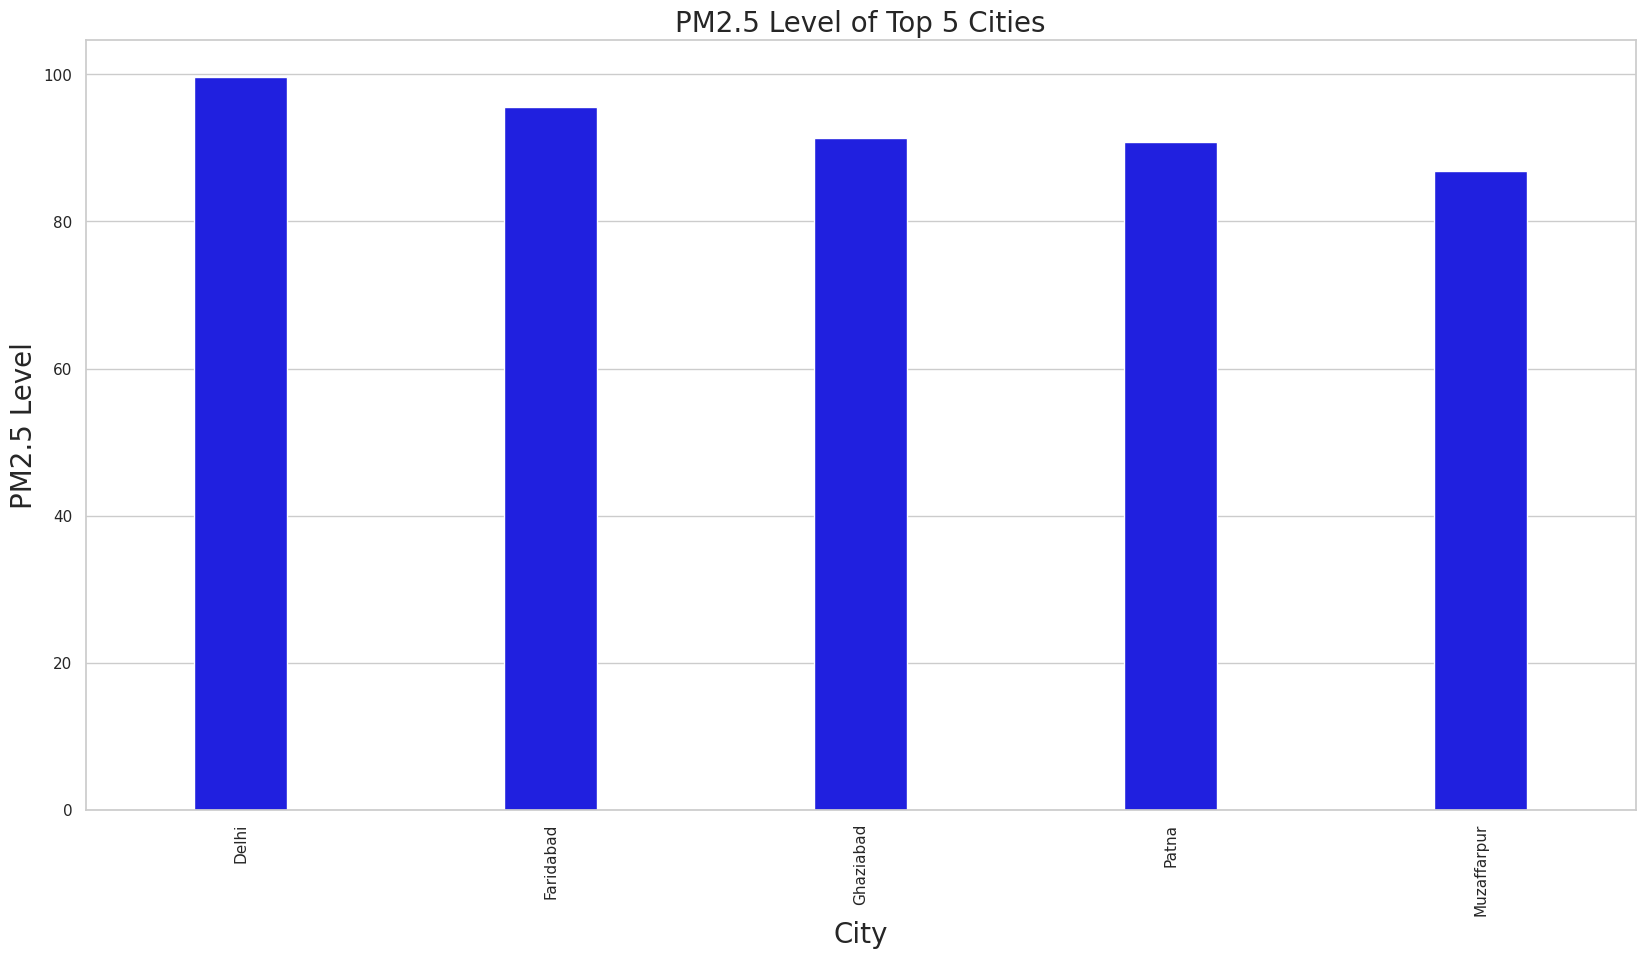

In [67]:
list_cities = ["Delhi","Faridabad", "Ghaziabad", "Patna", "Muzaffarpur"]
list_pm25_values = [99.7, 95.6, 91.3, 90.9, 86.9]
df = pd.DataFrame(columns=["City", "ANNUAL_PM_2.5"])
df.loc[0] = ["Delhi", 99.7]
df.loc[1] = ["Faridabad", 95.6]
df.loc[2] = ["Ghaziabad", 91.3]
df.loc[3] = ["Patna", 90.8]
df.loc[4] = ["Muzaffarpur", 86.9]
# df.head()
plt.figure(figsize=(20,10))
sns.barplot(x='City', y='ANNUAL_PM_2.5', data=df, color='blue', width = 0.3)
plt.title('PM2.5 Level of Top 5 Cities', fontsize = 20)
plt.ylabel('PM2.5 Level', fontsize = 20)
plt.xlabel('City', fontsize = 20)
plt.xticks(rotation=90)
plt.show()